In [39]:
import pandas as pd
import datetime
import os

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
sns.set(color_codes=True)

# if matplotlib is not set inline, you will not see plots
%matplotlib inline 

In [41]:
targetdir = "./data/TraderStrength/seven_day_window/"
filelist = os.listdir(targetdir) 
columns = ["timestamp", "window", "trader", "spent", "gained", "purchased", "sold", "strength", "activity", 
           "purchased_info", "sold_nfo"]

df7 = pd.concat((pd.read_csv(targetdir + file, names= columns) 
                for file in filelist), ignore_index=True)

In [42]:
df7[:10]

,timestamp,window,trader,spent,gained,purchased,sold,strength,activity,purchased_info,sold_nfo
0,1511478000000,604800000,0x9c2ce25922dc592ffdf7f2c6b0a8678b21682116,15.622583,0.000000,4,0,4,1,(Cryptokittie_Art_4),NaN
1,1511478000000,604800000,0x78cff6a05343b7ab7d5dd453d39fa90427889e4e,17.598492,0.000000,2,0,2,1,(Cryptokittie_Art_2),NaN
2,1511478000000,604800000,0xb89465f04caf9334d3d116637ac2a9c4aa8dcff6,22.061525,0.000000,3,0,3,1,(Cryptokittie_Art_3),NaN
3,1511478000000,604800000,0xd5bfcb58f900b31c8155057616482a9d4ad70170,21.426150,0.000000,3,0,3,1,(Cryptokittie_Art_3),NaN
4,1511478000000,604800000,0xeb53365cf3fdab44aa568c2736697e41b15e300e,58.156807,0.000000,8,0,8,1,(Cryptokittie_Art_8),NaN
5,1511478000000,604800000,0x0441ba4e3ffc47b2ff5c5f8a47d11d5d64b3ffeb,8.147276,0.000000,2,0,2,1,(Cryptokittie_Art_2),NaN
6,1511478000000,604800000,0x01b24d8631caf2ed9385e440534fcbddc9cf962e,45.137669,0.000000,12,0,12,1,(Cryptokittie_Art_12),NaN
7,1511478000000,604800000,0x9fce702b9bd1af98b0668c12f5fe92cf3e9bff85,13.792429,3.999554,3,1,4,1,(Cryptokittie_Art_3),(Cryptokittie_Art_1)
8,1511478000000,604800000,0x80f892c4783892c9caa72c616ceeb9a40333b963,13.477692,0.000000,3,0,3,1,(Cryptokittie_Art_3),NaN
9,1511478000000,604800000,0xef42cf85be6adf3081ada73af87e27996046fe63,3.060310,8.392553,1,1,2,1,(Cryptokittie_Art_1),(Cryptokittie_Art_1)


In [43]:
df7 = df7[["timestamp", "strength"]]
df7["timestamp"] = pd.to_datetime(df7["timestamp"], unit='ms').dt.normalize()
df7

,timestamp,strength
0,2017-11-23,4
1,2017-11-23,2
2,2017-11-23,3
3,2017-11-23,3
4,2017-11-23,8
...,...,...
8576301,2021-04-27,6
8576302,2021-04-27,1
8576303,2021-04-27,2
8576304,2021-04-27,2


In [44]:
len(df7["timestamp"].unique())

1252

In [45]:
df7

,timestamp,strength
0,2017-11-23,4
1,2017-11-23,2
2,2017-11-23,3
3,2017-11-23,3
4,2017-11-23,8
...,...,...
8576301,2021-04-27,6
8576302,2021-04-27,1
8576303,2021-04-27,2
8576304,2021-04-27,2


In [46]:
df7.sort_values(["timestamp"])

,timestamp,strength
0,2017-11-23,4
7509889,2017-11-23,4
7509890,2017-11-23,3
7509891,2017-11-23,2
7509892,2017-11-23,1
...,...,...
5365664,2021-04-27,2
5365663,2021-04-27,2
5365662,2021-04-27,2
5365669,2021-04-27,2


In [47]:
df7[df7["timestamp"] == "2021-02-27"]

,timestamp,strength
635027,2021-02-27,2
635028,2021-02-27,12
635029,2021-02-27,1
635030,2021-02-27,3
635031,2021-02-27,10
...,...,...
8160182,2021-02-27,14
8160183,2021-02-27,3
8160184,2021-02-27,21
8160185,2021-02-27,2


In [48]:
df7[df7["timestamp"] == "2017-11-23"]

,timestamp,strength
0,2017-11-23,4
1,2017-11-23,2
2,2017-11-23,3
3,2017-11-23,3
4,2017-11-23,8
...,...,...
7509890,2017-11-23,3
7509891,2017-11-23,2
7509892,2017-11-23,1
7509893,2017-11-23,2


# Seven-day window

## Mean weight per day

In [49]:
df7_mean = df7.groupby(["timestamp"]).mean()
df7_mean = df7_mean.reset_index()
df7_mean

,timestamp,strength
0,2017-11-23,9.568627
1,2017-11-24,6.943396
2,2017-11-25,6.556391
3,2017-11-26,6.655963
4,2017-11-27,6.503018
...,...,...
1247,2021-04-23,10.739259
1248,2021-04-24,10.641347
1249,2021-04-25,10.399029
1250,2021-04-26,10.056677


In [50]:
df7_mean.sort_values(["strength"], ascending=False)

,timestamp,strength
735,2019-11-28,58.164448
736,2019-11-29,55.768831
734,2019-11-27,53.334039
737,2019-11-30,52.353655
733,2019-11-26,48.112959
...,...,...
51,2018-01-13,3.102202
50,2018-01-12,3.015296
47,2018-01-09,2.982004
48,2018-01-10,2.937612


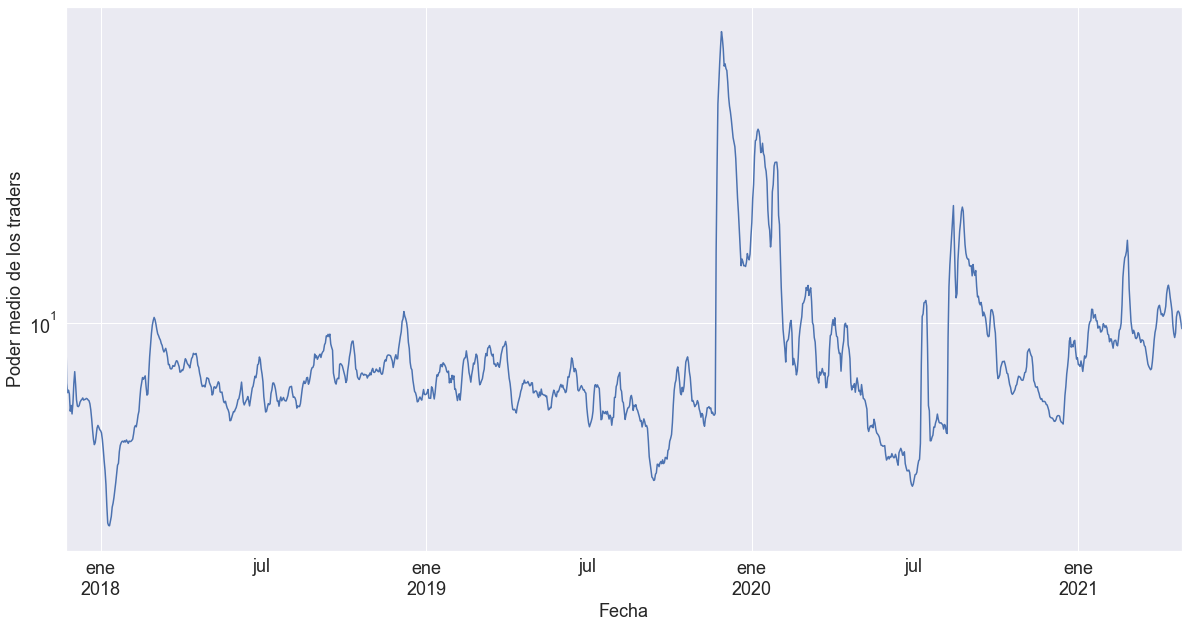

In [52]:
import locale
locale.setlocale(locale.LC_ALL, 'es_ES')

ax = df7_mean.plot(kind = 'line', x = 'timestamp', y = 'strength')
ax.set_yscale('log')
ax.set_xlabel("Fecha", fontsize=18)
ax.set_ylabel("Poder medio de los traders", fontsize=18)
ax.get_legend().remove()
plt.rcParams["figure.figsize"] = (20,10)
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 

plt.savefig("./strengthCDF/seven_day_window/seven_day_window_mean_strengthCDF.svg", bbox_inches='tight')

## Median weight per day

In [53]:
df7_median = df7.groupby(["timestamp"]).median()
df7_median = df7_median.reset_index()
df7_median

,timestamp,strength
0,2017-11-23,3.0
1,2017-11-24,2.0
2,2017-11-25,2.0
3,2017-11-26,2.0
4,2017-11-27,2.0
...,...,...
1247,2021-04-23,2.0
1248,2021-04-24,2.0
1249,2021-04-25,2.0
1250,2021-04-26,2.0


In [54]:
df7_median["strength"].unique()

array([3. , 2. , 1. , 1.5])

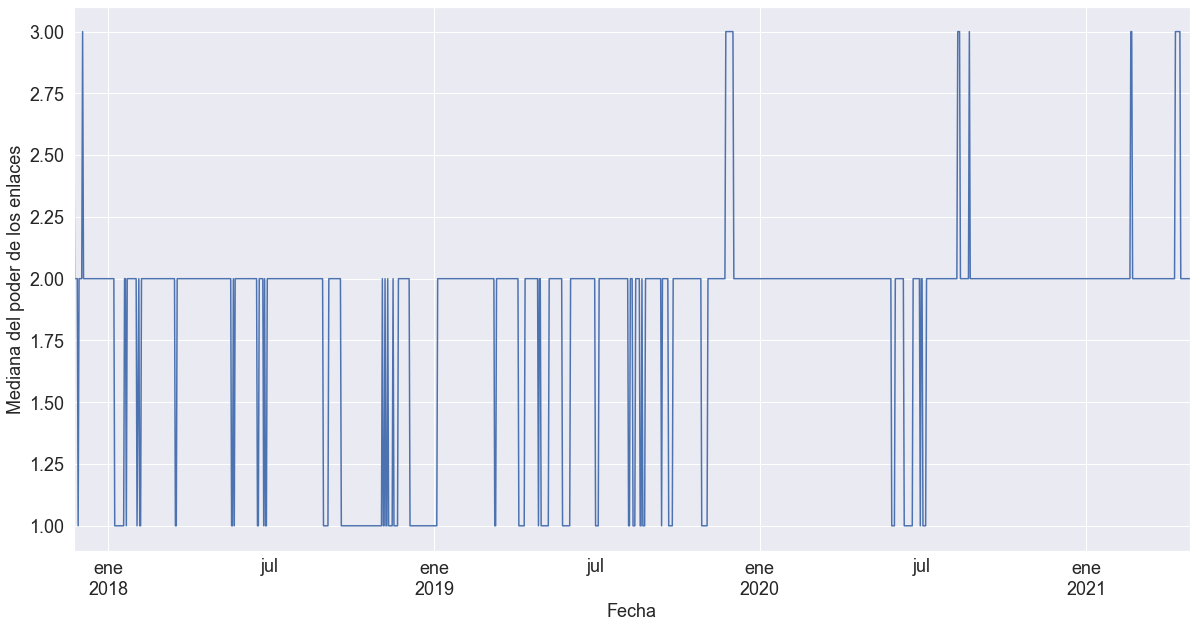

In [55]:
ax = df7_median.plot(kind = 'line', x = 'timestamp', y = 'strength')

#ax.set_yscale('log')
ax.set_xlabel("Fecha", fontsize=18)
ax.set_ylabel("Mediana del poder de los enlaces", fontsize=18)
ax.get_legend().remove()
#plt.legend(["Todos los activos"])

plt.savefig("./strengthCDF/seven_day_window/seven_day_window_median_strengthCDF.svg", bbox_inches='tight')

## Max weight per day

In [56]:
df7_max = df7.groupby(["timestamp"]).max()
df7_max = df7_max.reset_index()
df7_max

,timestamp,strength
0,2017-11-23,434
1,2017-11-24,434
2,2017-11-25,434
3,2017-11-26,434
4,2017-11-27,434
...,...,...
1247,2021-04-23,10017
1248,2021-04-24,10067
1249,2021-04-25,8740
1250,2021-04-26,12221


In [57]:
df7_max.sort_values(["strength"], ascending=False)

,timestamp,strength
735,2019-11-28,94162
736,2019-11-29,90391
737,2019-11-30,84173
734,2019-11-27,84098
739,2019-12-02,76556
...,...,...
946,2020-06-26,213
943,2020-06-23,213
944,2020-06-24,199
941,2020-06-21,193


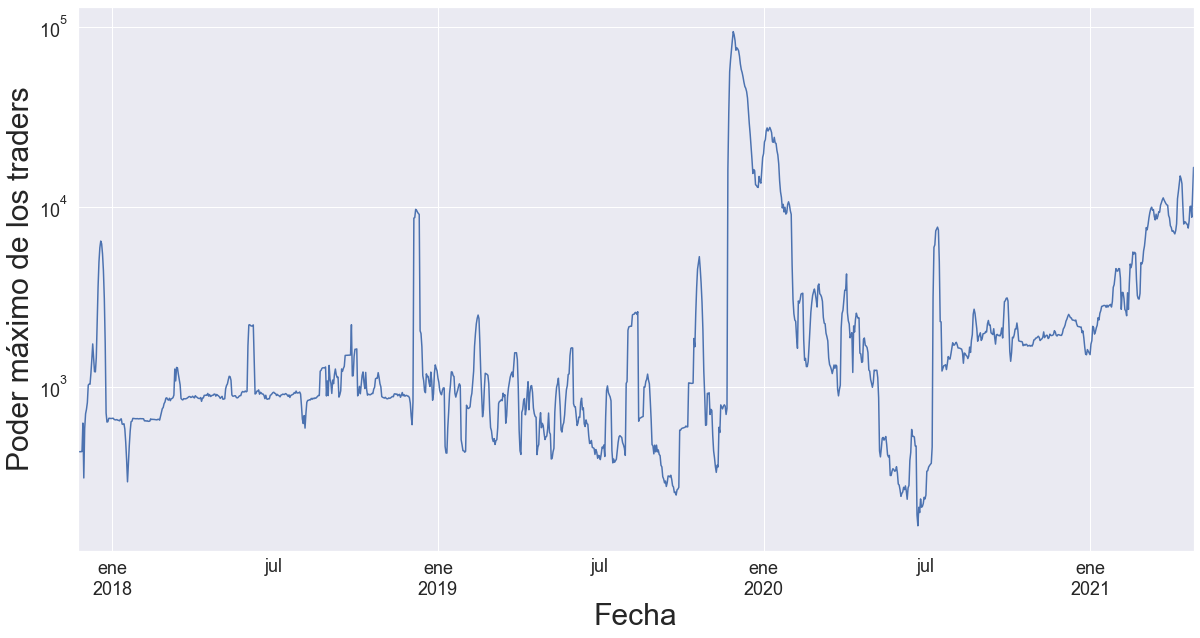

In [58]:
ax = df7_max.plot(kind = 'line', x = 'timestamp', y = 'strength')

ax.set_yscale('log')
ax.set_xlabel("Fecha", fontsize=30)
ax.set_ylabel("Poder máximo de los traders", fontsize=30)
ax.get_legend().remove()

plt.savefig("./strengthCDF/seven_day_window/seven_day_window_max_strengthCDF.svg", bbox_inches='tight')

# Thirty-day window

In [59]:
targetdir = "./data/TraderStrength/thirty_day_window/"
filelist = os.listdir(targetdir) 
columns = ["timestamp", "window", "trader", "spent", "gained", "purchased", "sold", "strength", "activity", 
           "purchased_info", "sold_nfo"]

df30 = pd.concat((pd.read_csv(targetdir + file, names= columns) 
                for file in filelist), ignore_index=True)

df30 = df30[["timestamp", "strength"]]
df30["timestamp"] = pd.to_datetime(df30["timestamp"], unit='ms').dt.normalize()
df30

,timestamp,strength
0,2017-11-23,4
1,2017-11-23,2
2,2017-11-23,3
3,2017-11-23,3
4,2017-11-23,8
...,...,...
19683461,2021-04-27,21
19683462,2021-04-27,1
19683463,2021-04-27,4
19683464,2021-04-27,2


## Mean weight per day

In [60]:
df30_mean = df30.groupby(["timestamp"]).mean()
df30_mean = df30_mean.reset_index()
df30_mean

,timestamp,strength
0,2017-11-23,9.568627
1,2017-11-24,6.943396
2,2017-11-25,6.556391
3,2017-11-26,6.655963
4,2017-11-27,6.503018
...,...,...
1247,2021-04-23,15.612609
1248,2021-04-24,15.218335
1249,2021-04-25,14.768136
1250,2021-04-26,14.223794


In [61]:
df30_mean.sort_values(["strength"], ascending=False)

,timestamp,strength
758,2019-12-21,67.388700
757,2019-12-20,66.927820
756,2019-12-19,66.602620
755,2019-12-18,66.590102
754,2019-12-17,66.315028
...,...,...
5,2017-11-28,5.862500
67,2018-01-29,5.859982
68,2018-01-30,5.799388
70,2018-02-01,5.736478


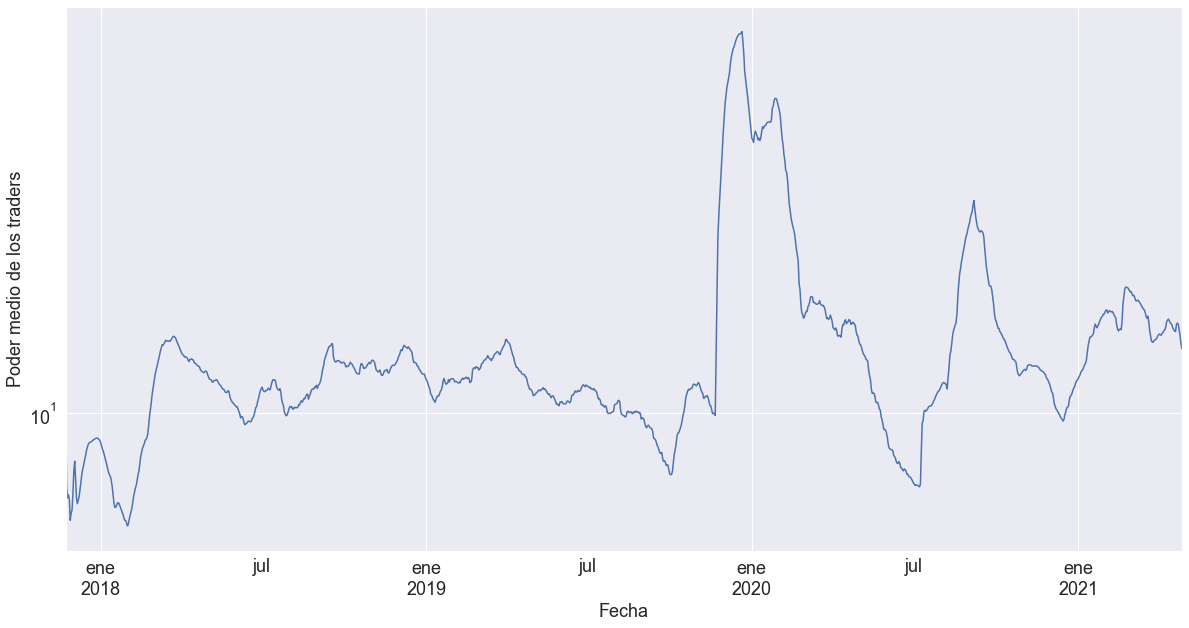

In [62]:
import locale
locale.setlocale(locale.LC_ALL, 'es_ES')

ax = df30_mean.plot(kind = 'line', x = 'timestamp', y = 'strength')
ax.set_yscale('log')
ax.set_xlabel("Fecha", fontsize=18)
ax.set_ylabel("Poder medio de los traders", fontsize=18)
ax.get_legend().remove()
plt.rcParams["figure.figsize"] = (20,10)
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 

plt.savefig("./strengthCDF/thirty_day_window/thirty_day_window_mean_strengthCDF.svg", bbox_inches='tight')

## Median weight per day

In [63]:
df30_median = df30.groupby(["timestamp"]).median()
df30_median = df30_median.reset_index()
df30_median

,timestamp,strength
0,2017-11-23,3.0
1,2017-11-24,2.0
2,2017-11-25,2.0
3,2017-11-26,2.0
4,2017-11-27,2.0
...,...,...
1247,2021-04-23,2.0
1248,2021-04-24,2.0
1249,2021-04-25,2.0
1250,2021-04-26,2.0


In [64]:
df30_median["strength"].unique()

array([3., 2., 1.])

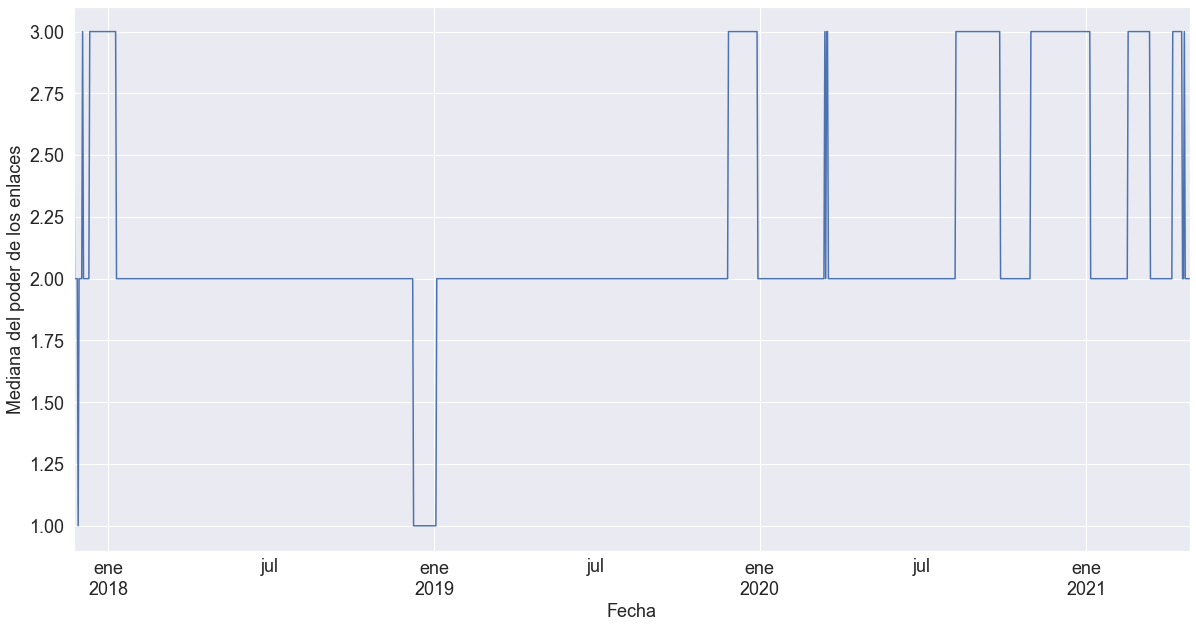

In [65]:
ax = df30_median.plot(kind = 'line', x = 'timestamp', y = 'strength')

#ax.set_yscale('log')
ax.set_xlabel("Fecha", fontsize=18)
ax.set_ylabel("Mediana del poder de los enlaces", fontsize=18)
ax.get_legend().remove()
#plt.legend(["Todos los activos"])

plt.savefig("./strengthCDF/thirty_day_window/thirty_day_window_median_strengthCDF.svg", bbox_inches='tight')

## Max weight per day

In [66]:
df30_max = df30.groupby(["timestamp"]).max()
df30_max = df30_max.reset_index()
df30_max

,timestamp,strength
0,2017-11-23,434
1,2017-11-24,434
2,2017-11-25,434
3,2017-11-26,434
4,2017-11-27,434
...,...,...
1247,2021-04-23,34651
1248,2021-04-24,34317
1249,2021-04-25,34107
1250,2021-04-26,33855


In [67]:
df30_max.sort_values(["strength"], ascending=False)

,timestamp,strength
758,2019-12-21,231660
757,2019-12-20,227600
756,2019-12-19,226954
755,2019-12-18,226200
754,2019-12-17,224803
...,...,...
1,2017-11-24,434
4,2017-11-27,434
3,2017-11-26,434
2,2017-11-25,434


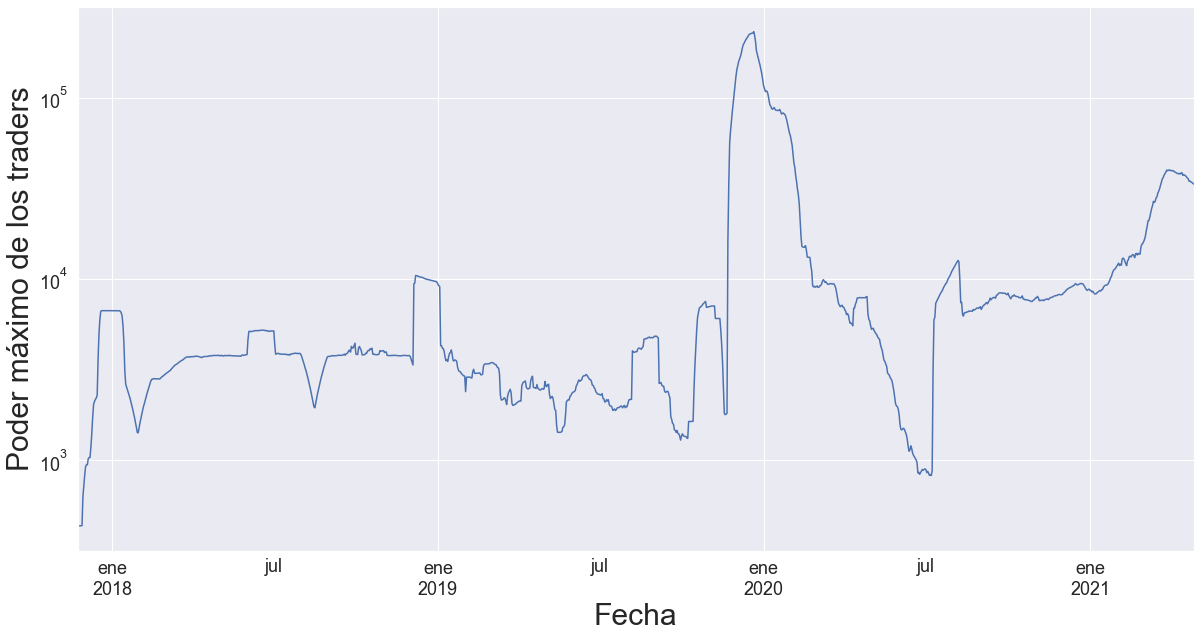

In [68]:
ax = df30_max.plot(kind = 'line', x = 'timestamp', y = 'strength')

ax.set_yscale('log')
ax.set_xlabel("Fecha", fontsize=30)
ax.set_ylabel("Poder máximo de los traders", fontsize=30)
ax.get_legend().remove()

plt.savefig("./strengthCDF/thirty_day_window/thirty_day_window_max_strengthCDF.svg", bbox_inches='tight')